<a href="https://colab.research.google.com/github/laraccano84/Mentoria_mumuki/blob/main/analisis_mumuki_Estatus_Ejercicios_Envios_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DIPLOMATURA EN CIENCIA DE DATOS, APRENDIZAJE AUTOMÁTICO Y SUS APLICACIONES

## Analisis y visuzlización de datos 

*Lectura del DataSet*

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn 
import datetime as dt
import requests
import json
import math
import glob
import cufflinks as cf



In [2]:
#pip install pandas_bokeh

In [3]:
import pandas_bokeh


In [4]:
url= 'https://raw.githubusercontent.com/laraccano84/Mentoria_mumuki/main/DataSet_Mumuki_New.csv'
df = pd.read_csv(url)

In [5]:
sns  = seaborn

In [6]:
pandas_bokeh.output_notebook()

Loading BokehJS ...

## Analisis de temas por Frustración, poner la hipotesis o preguta?????

 **Se crea una columna Estatus donde el valor 1 equivale a paso y 0 equivale a no_paso.**

In [7]:
def set_status(Estatus):
    if Estatus == ('paso'):
        return 1
    if Estatus == ('no_paso' or 'pending' or 'aborted' ):
        return 0
 

In [8]:
df['Estatus_2'] = df['Estatus'].apply(set_status) 

**Análisis de los datos:**

Se define arbitrariamente los intentos de realizar el ultimo ejercicio de cada leccion, para luego identificar la cantidad  de alumnos llegaron al final del recorrido de esa lección y lo aprobaron. 
Para eso se realiza la siguiente función:

In [9]:
def set_leccion_realizada(exercise_name):
    if (exercise_name == ('Tipos de datos / Datos de todo tipo'or 'Calefones / Poniendo topes')):
        return 'Llego al final de la leccion Uno'
    if (exercise_name == ('¿Está cerca?')):
        return 'Llego al final de la leccion Dos'
    if (exercise_name == ('Esto no tiene valor')):
        return 'Llego al final de la leccion Tres'
  
    

In [10]:
df['Lecciones_completas'] = df['exercise_name'].apply(set_leccion_realizada) 

Frecuencia de envios para el ultimo ejercicio de cada leccion

In [11]:
freq_by_lecciones = (df.groupby("Lecciones_completas").agg(frequency=("Lecciones_completas", "count")))
print(freq_by_lecciones)

                                   frequency
Lecciones_completas                         
Llego al final de la leccion Dos        1197
Llego al final de la leccion Tres        378
Llego al final de la leccion Uno        2658


In [12]:
freq_by_lecciones.plot_bokeh(kind='barh',stacked=True);

Agrupando por estatus podemos indertificar de estos cuantos envios aprobaron el ultimo ejercicio de cada leccion.

In [13]:
df_conj3=df.groupby(['Estatus','Lecciones_completas']).agg({'student_uid':'count'})
print(df_conj3)

                                           student_uid
Estatus Lecciones_completas                           
no_paso Llego al final de la leccion Dos           987
        Llego al final de la leccion Uno          1152
paso    Llego al final de la leccion Dos           210
        Llego al final de la leccion Tres          378
        Llego al final de la leccion Uno          1506


*De estos datos se pueden observar que el 100% de envios que llegan al ultimo ejercicio de la leccion 3 lo aprueban. La leccion 1 tiene mas intentos de envios y de estos la mayoria aprueba.*

*Se oberva una notable baja entre la cantidad de envios por leccion.*

In [15]:
#Cantidad de estudiantes que aprueban y/o desaprueban cada leccion
df_conj5=df.groupby(['Estatus','Lecciones_completas']).agg({'student_uid': (lambda x: len(set(x)))})
print(df_conj5)

                                           student_uid
Estatus Lecciones_completas                           
no_paso Llego al final de la leccion Dos           173
        Llego al final de la leccion Uno           148
paso    Llego al final de la leccion Dos           204
        Llego al final de la leccion Tres          195
        Llego al final de la leccion Uno           243


In [16]:
df_conj5.plot_bokeh(kind='barh',stacked=True);

In [17]:
#Frecuencia de estatus por cantidad total de intentos
freq_estatus_envio = df['Estatus'].value_counts() 
print(freq_estatus_envio) 

no_paso    33664
paso       13519
Name: Estatus, dtype: int64


Relacion porcentual de los intentos por estatus

In [18]:
100 * df['Estatus'].value_counts() / len(df['submission_status'])

no_paso    71.347731
paso       28.652269
Name: Estatus, dtype: float64

Grafica del promedio del estatus de los ejercicios

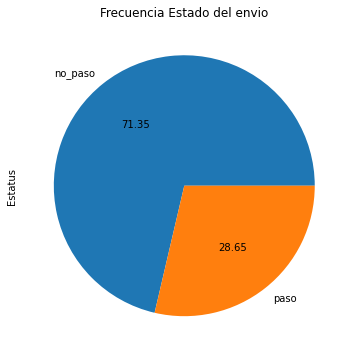

In [19]:
plot = df['Estatus'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Frecuencia Estado del envio')

Como se puede visualizar en los datos como en las graficas, la mayor cantidad de intentos tiene como estatus NO PASO, y esto se traduce en los intentos por ejercicio. 

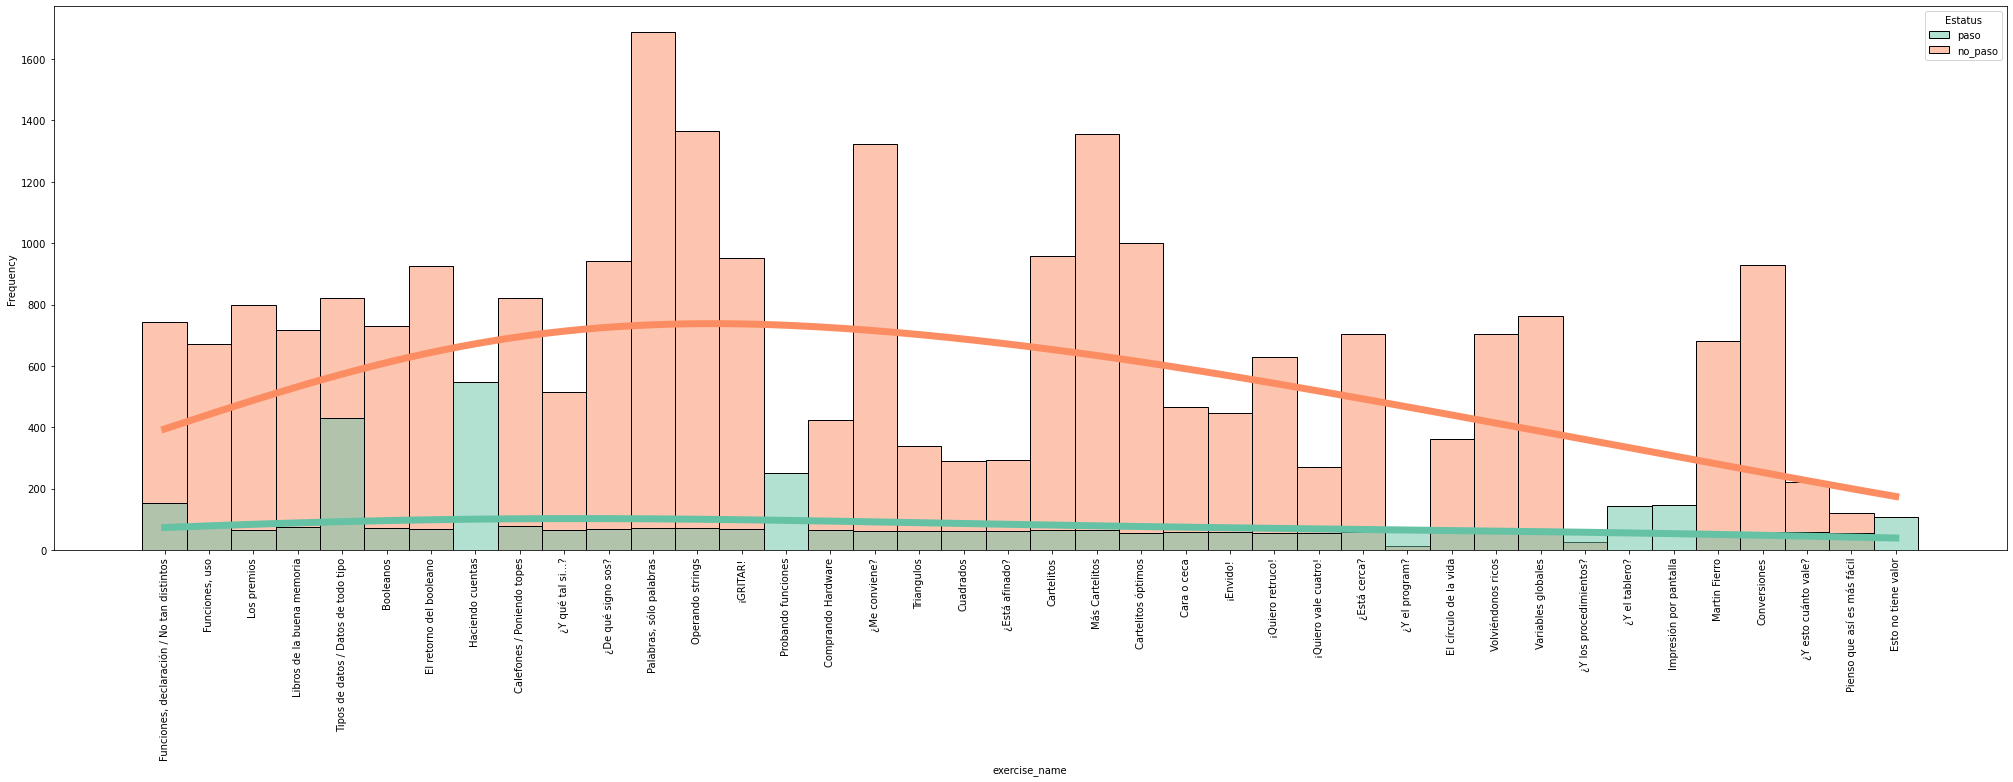

In [21]:
fig=plt.figure(figsize=(35,10))

seaborn.histplot(data=df,  # the long-formatted data frame
kde=True,     # draw kernel density estimation line as well
stat='frequency',  # the y-axis is the frequency
x='exercise_name',  # the column of dataframe we want to visualize
hue='Estatus',    # the categorical column
multiple='layer',   # how to lay out different categories's data
kde_kws={'bw_adjust':5},   # adjust the smoothness of kde curve
line_kws={'linewidth':7}, #adjust the aesthetic element of kde curve
palette='Set2')
plt.xticks(rotation=90);


### Hipotesis 3: Todos los ejercicios tienen igual cantidad de fallos.
Con la siguiente tabla se comprueba que estos es FALSO

In [23]:
df[['student_uid', 'exercise_name']].groupby('exercise_name').describe()

student_uid                         \
                                                count        mean        std   
exercise_name                                                                  
Booleanos                                      1275.0  215.890196  81.516526   
Calefones / Poniendo topes                     1423.0  209.815882  81.500131   
Cara o ceca                                     860.0  219.182558  66.087468   
Cartelitos                                     1574.0  225.130241  74.593479   
Cartelitos óptimos                             1597.0  232.542267  68.000380   
Comprando Hardware                              827.0  228.239420  77.194423   
Conversiones                                   1513.0  225.218771  72.325820   
Cuadrados                                       626.0  228.736422  72.773023   
El círculo de la vida                           709.0  223.142454  70.454684   
El retorno del booleano                        1542.0  224.552529  70.921181   
Esto no tiene valor                             378.0  222.730159  74.562179   
Funciones, declaración / No tan distintos      1574.0  225.144219  82.947100   
Funciones, uso                                 1221.0  221.000000  77.798637   
Haciendo cuentas                               1909.0  217.199057  82.167609   
Impresión por pantalla                          509.0  218.385069  73.429013   
Libros de la buena memoria                     1273.0  199.158680  81.533716   
Los premios                                    1347.0  220.213066  73.145796   
Martin Fierro                                  1148.0  222.742160  68.778124   
Más Cartelitos                                 2125.0  224.268706  72.398346   
Operando strings                               2168.0  223.828875  73.759870   
Palabras, sólo palabras                        2610.0  224.827969  81.744265   
Pienso que así es más fácil                     365.0  220.980822  69.937744   
Probando funciones                              881.0  216.552781  83.767792   
Tipos de datos / Datos de todo tipo            2658.0  224.621520  69.887988   
Triangulos                                      690.0  230.418841  69.516388   
Variables globales                             1262.0  218.079239  75.423773   
Volviéndonos ricos                             1187.0  224.778433  69.397654   
¡Envido!                                        835.0  219.021557  70.972718   
¡GRITAR!                                       1571.0  225.773393  76.215732   
¡Quiero retruco!                               1071.0  221.116713  69.541559   
¡Quiero vale cuatro!                            571.0  226.865149  69.467430   
¿De qué signo sos?                             1553.0  210.297489  70.732027   
¿Está afinado?                                  626.0  225.081470  72.476853   
¿Está cerca?                                   1197.0  222.948204  71.885609   
¿Me conviene?                                  2066.0  220.209100  72.108889   
¿Y el program?                                  234.0  222.269231  74.944215   
¿Y el tablero?                                  504.0  216.140873  80.728357   
¿Y esto cuánto vale?                            512.0  225.810547  69.069984   
¿Y los procedimientos?                          236.0  230.216102  71.629543   
¿Y qué tal si...?                               956.0  225.926778  75.428971   

                                                                               
                                            min     25%    50%     75%    max  
exercise_name                                                                  
Booleanos                                  -1.0  149.50  216.0  281.50  355.0  
Calefones / Poniendo topes                 -1.0  150.00  209.0  281.50  353.0  
Cara o ceca                                -1.0  161.00  216.0  271.25  353.0  
Cartelitos                                 -1.0  169.25  222.5  288.00  363.0  
Cartelitos óptimos                       

Frecuencia de estatus por ejercicio

In [24]:
# 0. es no_paso
# 1. es Paso
df.groupby(['exercise_name', 'Estatus'])['student_uid'].count().unstack()

Estatus,no_paso,paso
exercise_name,,
Booleanos,1022.0,253.0
Calefones / Poniendo topes,1152.0,271.0
Cara o ceca,655.0,205.0
Cartelitos,1345.0,229.0
Cartelitos óptimos,1402.0,195.0
Comprando Hardware,595.0,232.0
Conversiones,1304.0,209.0
Cuadrados,408.0,218.0
El círculo de la vida,508.0,201.0


In [25]:
Aprobo = df[df['Estatus'] == 'paso']
no_aprobo = df[df['Estatus'] == 'no_paso']

Identificar ejercicio con más intentos en estatus [Paso]

In [26]:
Aprobo['exercise_name'].describe()

count                13519
unique                  40
top       Haciendo cuentas
freq                  1909
Name: exercise_name, dtype: object

Identificar ejercicio con más intentos en estatus [No_paso]

In [27]:
no_aprobo['exercise_name'].describe()

count                       33664
unique                         35
top       Palabras, sólo palabras
freq                         2365
Name: exercise_name, dtype: object

Grafica de correlacion entre ejercicio y estatus

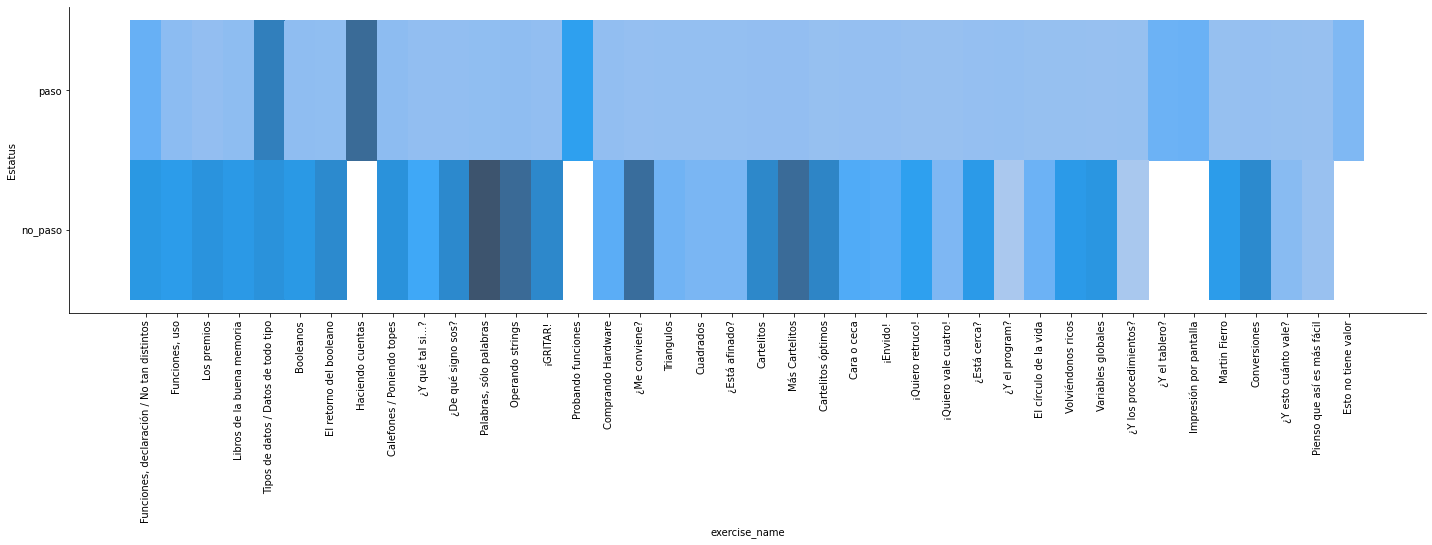

In [28]:
sns.displot(df, x="exercise_name", y="Estatus", aspect=4)
plt.xticks(rotation=90);

**Se puede identificar que hay ejercicios con una mayor dificultad que otros para los estudiantes ya que tienen una cantidad de envios en estatus no_paso**

Cantidad de envios realizado por usuario, total, paso, no paso

In [29]:
contador_estatus_estudiante= pd.crosstab(df["student_uid"],df["Estatus"],margins=True) 
contador_estatus_estudiante

Estatus,no_paso,paso,All
student_uid,,,
-1,31,41,72
75,1,0,1
76,42,47,89
77,91,95,186
78,69,15,84
...,...,...,...
359,19,19,38
361,1,0,1
362,3,0,3


Cantidad de envios correctos y totales por alumnos y media de estatus por alumno

In [30]:
data_esp = df.groupby('student_uid').agg({'Estatus_2':['sum', 'count', 'mean']})
data_esp

Estatus_2                
                  sum count      mean
student_uid                          
-1                 41    72  0.569444
 75                 0     1  0.000000
 76                47    89  0.528090
 77                95   186  0.510753
 78                15    84  0.178571
...               ...   ...       ...
 358                1     6  0.166667
 359               19    38  0.500000
 361                0     1  0.000000
 362                0     3  0.000000
 363                1    19  0.052632

[286 rows x 3 columns]

Cantidad de ejercicios que intento resolver cada estudiante.

In [31]:
df_student_exe = df.groupby(['student_uid']).agg({'exercise_name': (lambda x: len(set(x)))})
df_student_exe

,exercise_name
student_uid,
-1,28
75,1
76,36
77,40
78,9
...,...
358,1
359,16
361,1


La media de ejercicios resultos es de 31 con un desvio de 13.74 

El alumne/s que mas ejercicios resolvieron fue en numero de 41 

In [32]:
df_student_exe.describe()

,exercise_name
count,286.000000
mean,31.150350
std,13.386893
min,1.000000
25%,22.250000
50%,40.000000
75%,40.000000
max,40.000000


<AxesSubplot:ylabel='Count'>

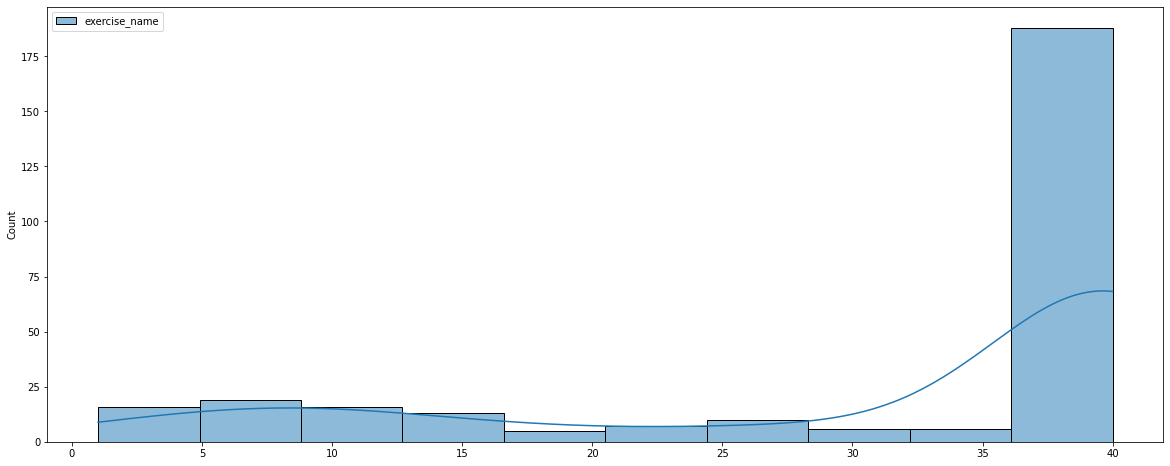

In [36]:
plt.figure(figsize=(20, 8))
seaborn.histplot(df_student_exe, kde=True)

Cantidad de ejercicios aprobados y desapronbados por alumno

In [34]:
df_student_estatus = df.groupby(['student_uid','submission_status' ]).agg({'exercise_name': (lambda x: len(set(x)))})
df_student_estatus

exercise_name
student_uid submission_status               
-1          errored                        3
            failed                        11
            passed                        28
 75         failed                         1
 76         errored                        6
...                                      ...
 361        failed                         1
 362        failed                         1
 363        errored                        3
            failed                         1
            passed                         1

[995 rows x 1 columns]

<AxesSubplot:ylabel='Count'>

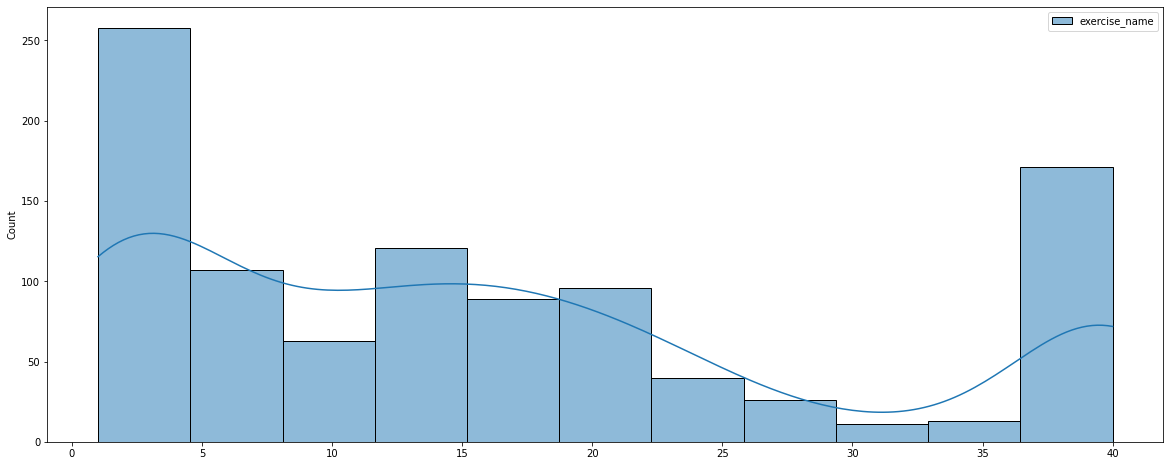

In [35]:
plt.figure(figsize=(20, 8))
seaborn.histplot(df_student_estatus, kde=True)

In [37]:
df[['exercise_name', 'student_uid']].groupby('student_uid').describe()

exercise_name                                                    \
                    count unique                                        top   
student_uid                                                                   
-1                     72     28  Funciones, declaración / No tan distintos   
 75                     1      1  Funciones, declaración / No tan distintos   
 76                    89     36                 Calefones / Poniendo topes   
 77                   186     40                         Cartelitos óptimos   
 78                    84      9                 Libros de la buena memoria   
...                   ...    ...                                        ...   
 358                    6      1                           Operando strings   
 359                   38     16                               Conversiones   
 361                    1      1                              ¿Me conviene?   
 362                    3      1                                 Triangulos   
 363                   19      3                         Cartelitos óptimos   

                  
            freq  
student_uid       
-1            11  
 75            1  
 76           10  
 77           31  
 78           38  
...          ...  
 358           6  
 359           7  
 361           1  
 362           3  
 363          12  

[286 rows x 4 columns]

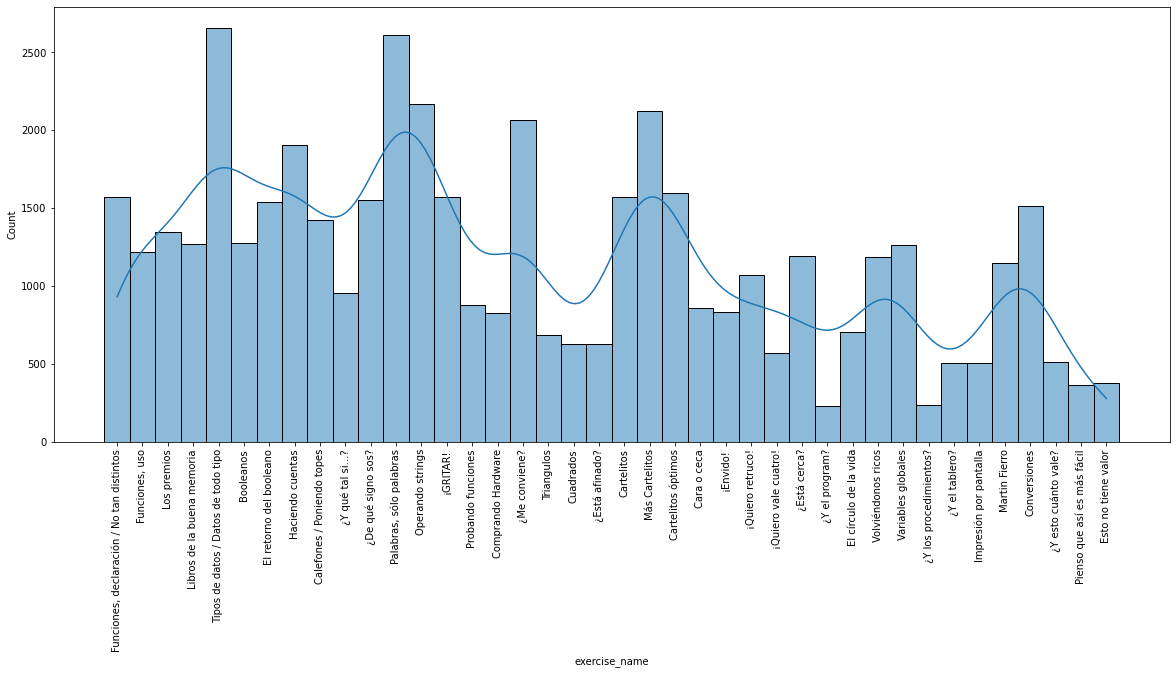

In [39]:
plt.figure(figsize=(20, 8))
seaborn.histplot(df.exercise_name, kde=True)
plt.xticks(rotation=90);

In [40]:
#Identificar rango: mayor cantidad de envios en status paso, no paso y mayor y menor cantidad de envios realizados por un estudiante
max_cantidad_envios_correctos = data_esp.max()
min_cantidad_envios_correctos = data_esp.min()

print(max_cantidad_envios_correctos, min_cantidad_envios_correctos)

Estatus_2  sum       95.0
           count    660.0
           mean       1.0
dtype: float64 Estatus_2  sum      0.0
           count    1.0
           mean     0.0
dtype: float64


El alumno que hizo mayor cantidad de envios correctos es de 95 y la mayor cantidad de envios totales de un alumno es de 660

El alumno que hizo menor cantidad de envios es de 1 envio y exiten alumnos que no tienen envios correctos

In [41]:
iqr = max_cantidad_envios_correctos.quantile(0.75) - min_cantidad_envios_correctos.quantile(0.25)
print(iqr)

377.5


In [42]:
#Estudiante con 100% de envios correctos
df_promedio_por_ej_por_std=df.groupby('student_uid').Estatus.value_counts() \
  .unstack(fill_value=0).reset_index()
df_promedio_por_ej_por_std[df_promedio_por_ej_por_std['no_paso']==0]

Estatus,student_uid,no_paso,paso
173,247,0,7


In [43]:
#Estudiante con 100% de envios incorrectos

df_promedio_por_ej_por_std=df.groupby('student_uid').Estatus.value_counts() \
  .unstack(fill_value=0).reset_index()
df_promedio_por_ej_por_std[df_promedio_por_ej_por_std['paso']==0]

Estatus,student_uid,no_paso,paso
1,75,1,0
57,131,6,0
68,142,1,0
69,143,3,0
283,361,1,0
284,362,3,0


In [44]:
df_promedio_por_ej_por_std['grupo_submission_status']=[ 'no_paso' if no_paso>paso else 'paso' for no_paso,paso,student_uid in zip(df_promedio_por_ej_por_std['no_paso'],df_promedio_por_ej_por_std['paso'],df_promedio_por_ej_por_std['student_uid'])]

Se decide agrupar a los alumnos en dos grupos segun tenga mayor cantidad de envios correctos/incorrectos

In [45]:
# Cantidad de alumnos con mayor cantidad de envios no_paso que paso y lo opuesto
df_promedio_por_ej_por_std['grupo_submission_status'].value_counts()

no_paso    235
paso        51
Name: grupo_submission_status, dtype: int64

In [46]:
#Se crean dos grupos:
#Un grupo_a de alumnos con mas envio correctos, que incorrectos o iguales.
#Un grupo_b con mayor cantidad de envios incorrectos que correctos.

grupo_a=df_promedio_por_ej_por_std[df_promedio_por_ej_por_std['grupo_submission_status']=='paso']
grupo_b=df_promedio_por_ej_por_std[df_promedio_por_ej_por_std['grupo_submission_status']=='no_paso']



In [48]:
#probabilidad de sacar estatus no paso/paso, por ejercicio ante un envio
Prob_ejer_grupo_b=(df.groupby(['submission_status', 'exercise_name']).count() / df.groupby('exercise_name').count())['student_uid']
print(Prob_ejer_grupo_b)

submission_status  exercise_name             
aborted            Cartelitos                    0.000635
                   Cuadrados                     0.001597
                   Palabras, sólo palabras       0.000383
errored            Booleanos                     0.472157
                   Calefones / Poniendo topes    0.205903
                                                   ...   
pending            Variables globales            0.000792
                   Volviéndonos ricos            0.000842
                   ¿De qué signo sos?            0.001288
                   ¿Me conviene?                 0.000484
                   ¿Y los procedimientos?        0.004237
Name: student_uid, Length: 131, dtype: float64


In [49]:
array_std_id_paso=[ student_uid for student_uid, ex_status in zip(df_promedio_por_ej_por_std['student_uid'],df_promedio_por_ej_por_std['grupo_submission_status']) if ex_status=='paso' ]

In [50]:
df_std_id_paso=df[ df['student_uid'].isin(array_std_id_paso)]

In [51]:
df_ex_name=df_std_id_paso.groupby(['exercise_name']).Estatus.value_counts() \
  .unstack(fill_value=0).reset_index()

In [52]:
#Probabilidad de pasar cada ejercicio siendo del grupo_a
df_ex_name['prom_no_paso']=[no_paso/(no_paso+paso) for paso,no_paso in zip(df_ex_name['paso'],df_ex_name['no_paso'])]
df_ex_name['prom_paso']=[paso/(no_paso+paso) for paso,no_paso in zip(df_ex_name['paso'],df_ex_name['no_paso'])]
df_ex_name

Estatus,exercise_name,no_paso,paso,prom_no_paso,prom_paso
0,Booleanos,84,41,0.672000,0.328000
1,Calefones / Poniendo topes,65,50,0.565217,0.434783
2,Cara o ceca,26,32,0.448276,0.551724
3,Cartelitos,55,34,0.617978,0.382022
4,Cartelitos óptimos,96,29,0.768000,0.232000
5,Comprando Hardware,34,32,0.515152,0.484848
6,Conversiones,71,30,0.702970,0.297030
7,Cuadrados,14,34,0.291667,0.708333
8,El círculo de la vida,15,28,0.348837,0.651163
9,El retorno del booleano,50,37,0.574713,0.425287


In [53]:
#Frecuencia de Estatus y probabilidad de aproba o desaprobar del grupo a por index de ejercicio
df_ex_name.plot_bokeh(kind='barh',stacked=True);

In [54]:
#analisis de prob de pasar cada tipo de ejercicio si se es del grupo b

array_std_id_no_paso=[ student_uid for student_uid, ex_status in zip(df_promedio_por_ej_por_std['student_uid'],df_promedio_por_ej_por_std['grupo_submission_status']) if ex_status=='no_paso' ]

df_std_id_no_paso=df[ df['student_uid'].isin(array_std_id_no_paso)]

df_ex_name_no_paso=df_std_id_no_paso.groupby(['exercise_name']).Estatus.value_counts() \
  .unstack(fill_value=0).reset_index()

df_ex_name_no_paso['prom_no_paso']=[no_paso/(no_paso+paso) for paso,no_paso in zip(df_ex_name_no_paso['paso'],df_ex_name_no_paso['no_paso'])]
df_ex_name_no_paso['prom_paso']=[paso/(no_paso+paso) for paso,no_paso in zip(df_ex_name_no_paso['paso'],df_ex_name_no_paso['no_paso'])]

df_ex_name_no_paso

Estatus,exercise_name,no_paso,paso,prom_no_paso,prom_paso
0,Booleanos,938,212,0.815652,0.184348
1,Calefones / Poniendo topes,1087,221,0.831040,0.168960
2,Cara o ceca,629,173,0.784289,0.215711
3,Cartelitos,1290,195,0.868687,0.131313
4,Cartelitos óptimos,1306,166,0.887228,0.112772
5,Comprando Hardware,561,200,0.737188,0.262812
6,Conversiones,1233,179,0.873229,0.126771
7,Cuadrados,394,184,0.681661,0.318339
8,El círculo de la vida,493,173,0.740240,0.259760
9,El retorno del booleano,1249,206,0.858419,0.141581


In [55]:
#Frecuencia de Estatus y probabilidad de aproba o desaprobar del grupo a por index de ejercicio
df_ex_name_no_paso.plot_bokeh(kind='barh',stacked=True);

In [56]:
#Medias de las probabilidades de pasar un ejercicio por grupo
mean_a_prom_grupo_a= df_ex_name['prom_paso'].mean() # media de probabilidad de pasar un ej del grupo paso
mean_b_prom_grupo_b=df_ex_name_no_paso['prom_paso'].mean() # media de probabilidad de pasar un ej del grupo no_paso
print(mean_a_prom_grupo_a, mean_b_prom_grupo_b)

0.5724409582207739 0.3434548654995961


In [57]:
#Diferencia de las probabilidades del estatus paso, entre los grupos
diferencia_prob_paso= [ {'exercise_name':ex_name, 'diferencia_prob':prob_paso_a-prob_paso_b } for prob_paso_a, prob_paso_b, ex_name in zip(df_ex_name['prom_paso'],df_ex_name_no_paso['prom_paso'],df_ex_name_no_paso['exercise_name']) ]
diferencia_prob_paso

[{'exercise_name': 'Booleanos', 'diferencia_prob': 0.1436521739130435},
 {'exercise_name': 'Calefones / Poniendo topes',
  'diferencia_prob': 0.2658223640473341},
 {'exercise_name': 'Cara o ceca', 'diferencia_prob': 0.3360134147390145},
 {'exercise_name': 'Cartelitos', 'diferencia_prob': 0.250709340596981},
 {'exercise_name': 'Cartelitos óptimos',
  'diferencia_prob': 0.11922826086956523},
 {'exercise_name': 'Comprando Hardware',
  'diferencia_prob': 0.22203639549237447},
 {'exercise_name': 'Conversiones', 'diferencia_prob': 0.17025916472667096},
 {'exercise_name': 'Cuadrados', 'diferencia_prob': 0.3899942329873126},
 {'exercise_name': 'El círculo de la vida',
  'diferencia_prob': 0.39140303093791473},
 {'exercise_name': 'El retorno del booleano',
  'diferencia_prob': 0.28370660030809336},
 {'exercise_name': 'Esto no tiene valor', 'diferencia_prob': 0.0},
 {'exercise_name': 'Funciones, declaración / No tan distintos',
  'diferencia_prob': 0.15124335314357207},
 {'exercise_name': 'Funci

Se puede concluir que cada grupo tiene probabilidades disntintas para pasar los ejercicios, siendo los alumnos del grupo 
a tiene mayor probabilidad de pasar los ejercicios, respecto a los del grupo b. De aca se pueden derivar otros hipotesis 
sobre comportamiento progreso por grupo y tipo de comportamiento (planner, no planner)

In [58]:
df_ex_name_date=df.groupby(['exercise_name', 'Date']).Estatus.value_counts().unstack(fill_value=0).reset_index()

In [59]:
#Ejercicios con mas frecuencia de accesos
ejercicios_mas_frecuencia_data=df_ex_name_date.groupby('exercise_name')['Date'].count().sort_values(ascending=False)
ejercicios_mas_frecuencia_data

exercise_name
¿Me conviene?                                105
Cartelitos óptimos                           102
Tipos de datos / Datos de todo tipo          102
Palabras, sólo palabras                       99
Más Cartelitos                                98
Cartelitos                                    98
Martin Fierro                                 95
Conversiones                                  95
¡Envido!                                      94
¡Quiero retruco!                              94
Funciones, declaración / No tan distintos     94
Comprando Hardware                            94
Cara o ceca                                   93
Booleanos                                     93
Funciones, uso                                92
Variables globales                            92
Los premios                                   92
Volviéndonos ricos                            91
¿Está cerca?                                  91
Libros de la buena memoria                    90
Operan

In [60]:
ejercicios_mas_frecuencia_data.plot_bokeh(kind='barh',stacked=True);

In [61]:
#Varianza y desvio de estatus por envio identificado por grupo
#no tener en cuenta el student_uid
n = len(grupo_a)
m = len(grupo_b)

varianza_grupo_a = grupo_a.var()
print("la varianza del grupo A es: ", varianza_grupo_a)
varianza_grupo_b = grupo_b.var()
print("la varianza del grupo B es: ", varianza_grupo_b)

desvst_grupo_a = grupo_a.std()
print("la desviación estandar del grupo A es: ", desvst_grupo_a)
desvst_grupo_b = grupo_b.std()
print("la desviación estandar del grupo B es: ", desvst_grupo_b)

la varianza del grupo A es:  Estatus
student_uid    7447.656471
no_paso         401.198431
paso            424.223529
dtype: float64
la varianza del grupo B es:  Estatus
student_uid    6867.293581
no_paso        8952.761520
paso            430.898527
dtype: float64
la desviación estandar del grupo A es:  Estatus
student_uid    86.299806
no_paso        20.029938
paso           20.596687
dtype: float64
la desviación estandar del grupo B es:  Estatus
student_uid    82.869135
no_paso        94.619034
paso           20.758095
dtype: float64


In [62]:
##DE ACA HACIA ABAJO FALTA ANALISIS##

In [63]:
#EstimacionPuntual
estimacion_puntual = mean_a_prom_grupo_a - mean_b_prom_grupo_b
estimacion_puntual


0.22898609272117781